In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),  # input_length removed
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model architecture in block format
model.summary()


2025-05-04 16:39:59.959169: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 16:40:00.082444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746357000.147028    4982 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746357000.166649    4982 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-04 16:40:00.302339: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

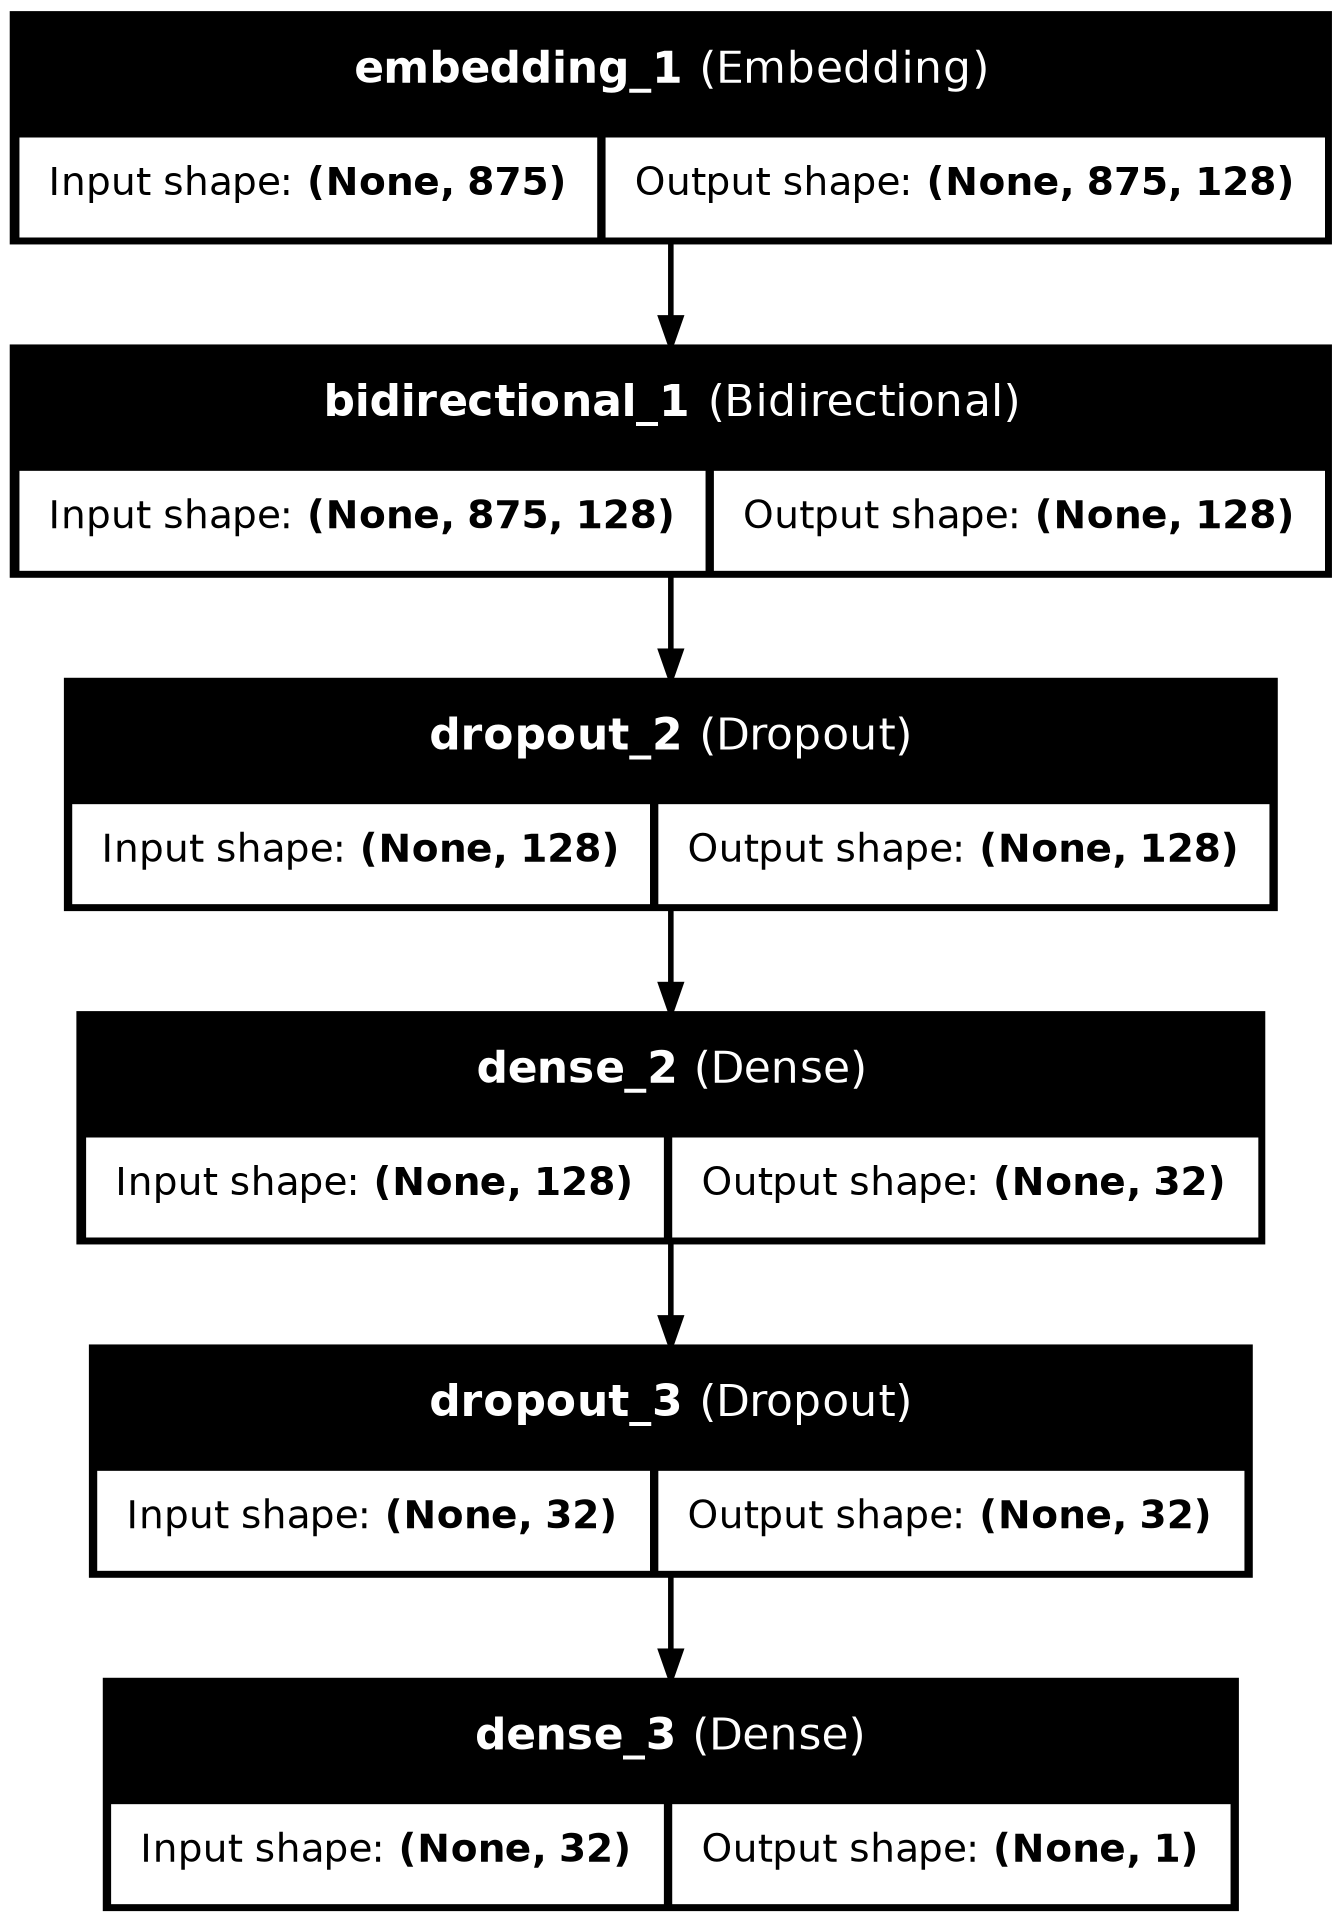

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Build the model using the correct input shape (sequence length = 875)
model.build(input_shape=(None, 875))  # None = flexible batch size

# Visualize the architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


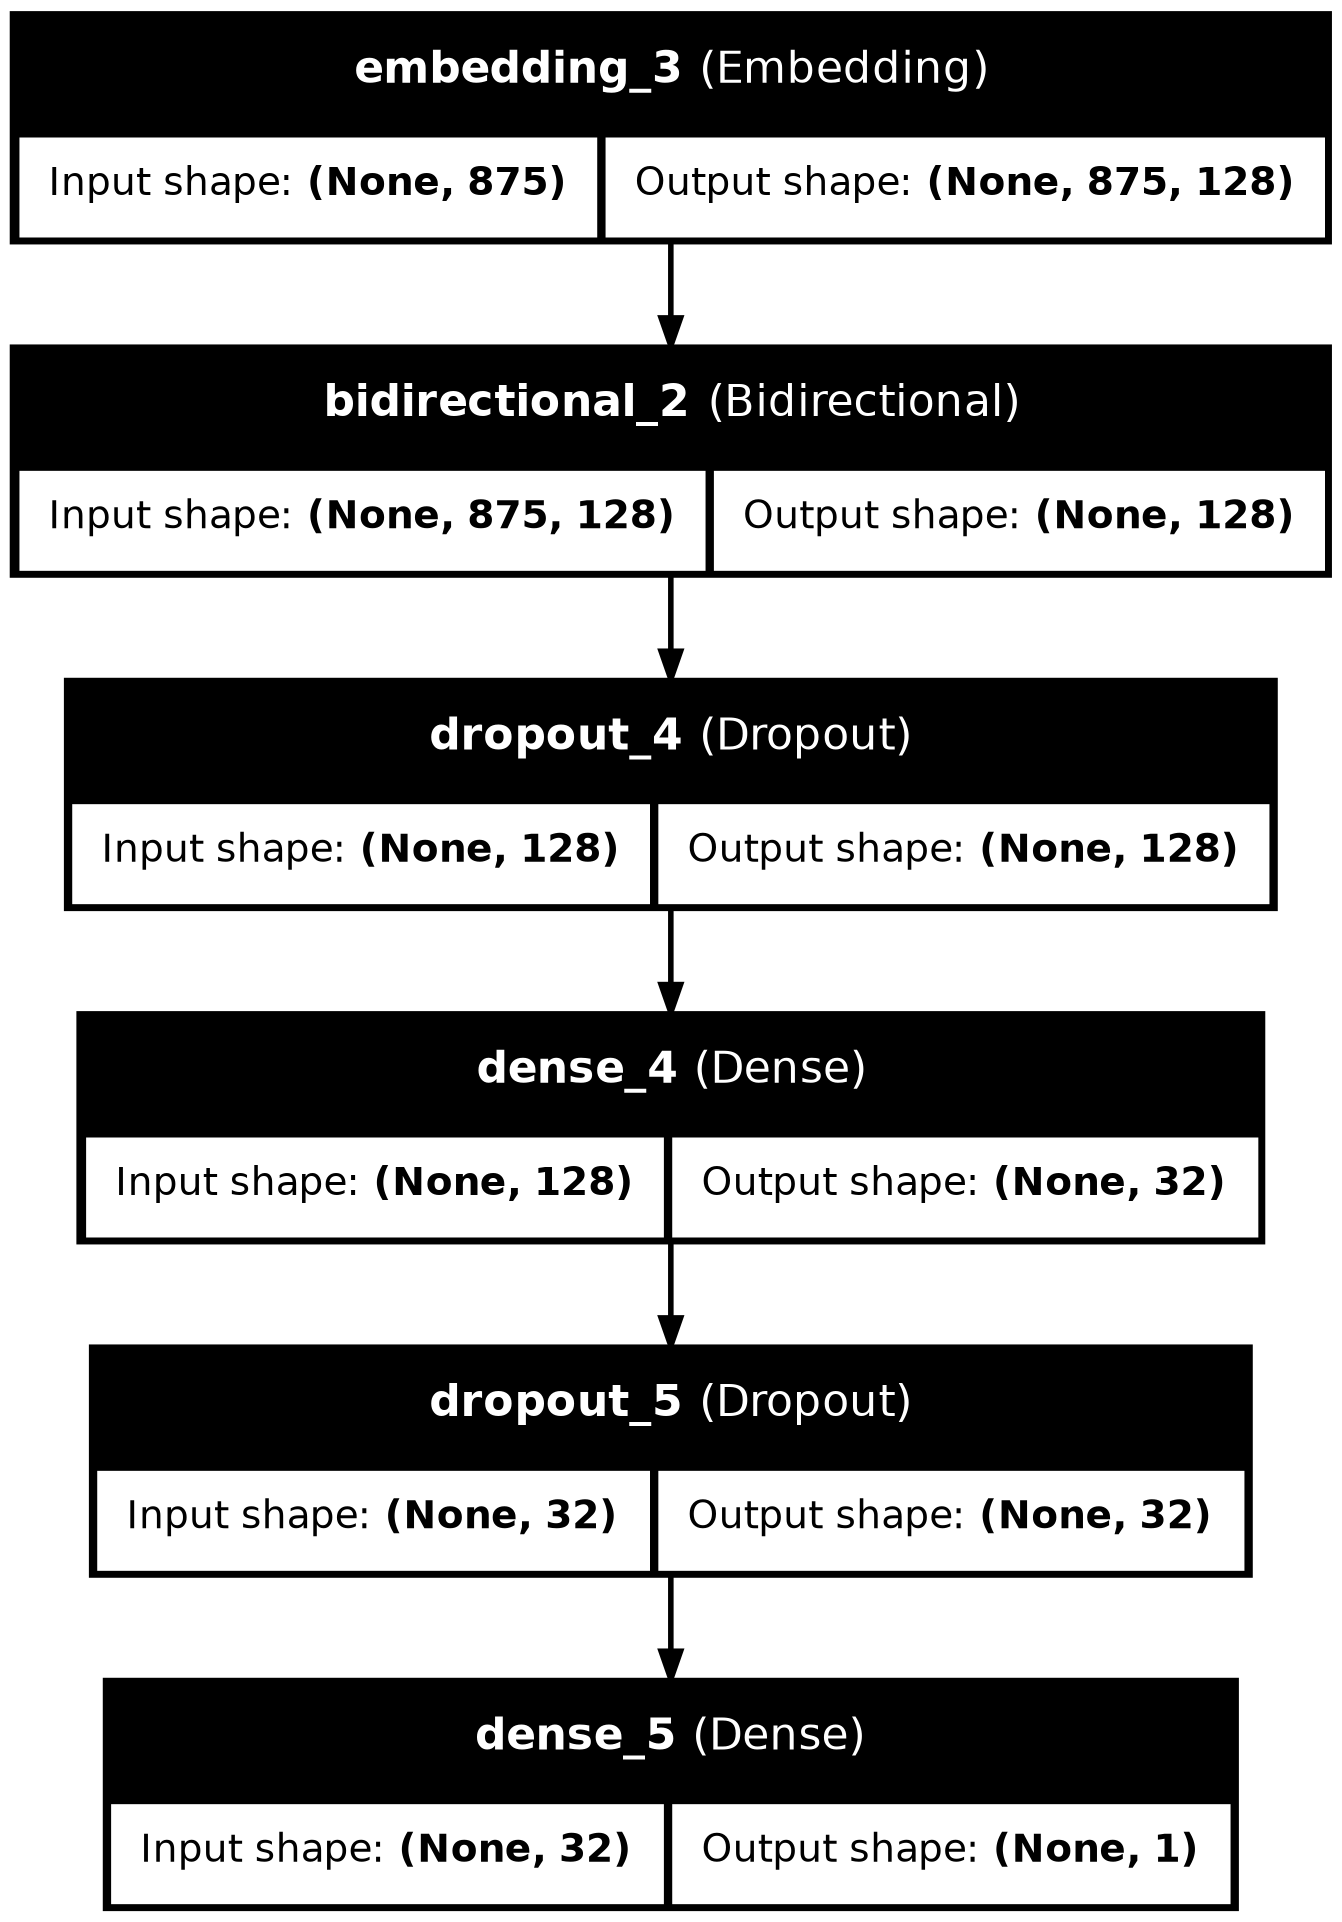

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(GRU(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Build the model using the correct input shape (sequence length = 875)
model.build(input_shape=(None, 875))  # None = flexible batch size

# Visualize the architecture
plot_model(model, to_file='BiGRU_model.png', show_shapes=True, show_layer_names=True)


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, MultiHeadAttention, LayerNormalization, Dropout, Dense, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
from tensorflow.keras.callbacks import EarlyStopping
from scipy.optimize import brentq
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
import re

2025-05-04 16:45:45.271461: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 16:45:45.288572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746357345.308253    5460 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746357345.314080    5460 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-04 16:45:45.334483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

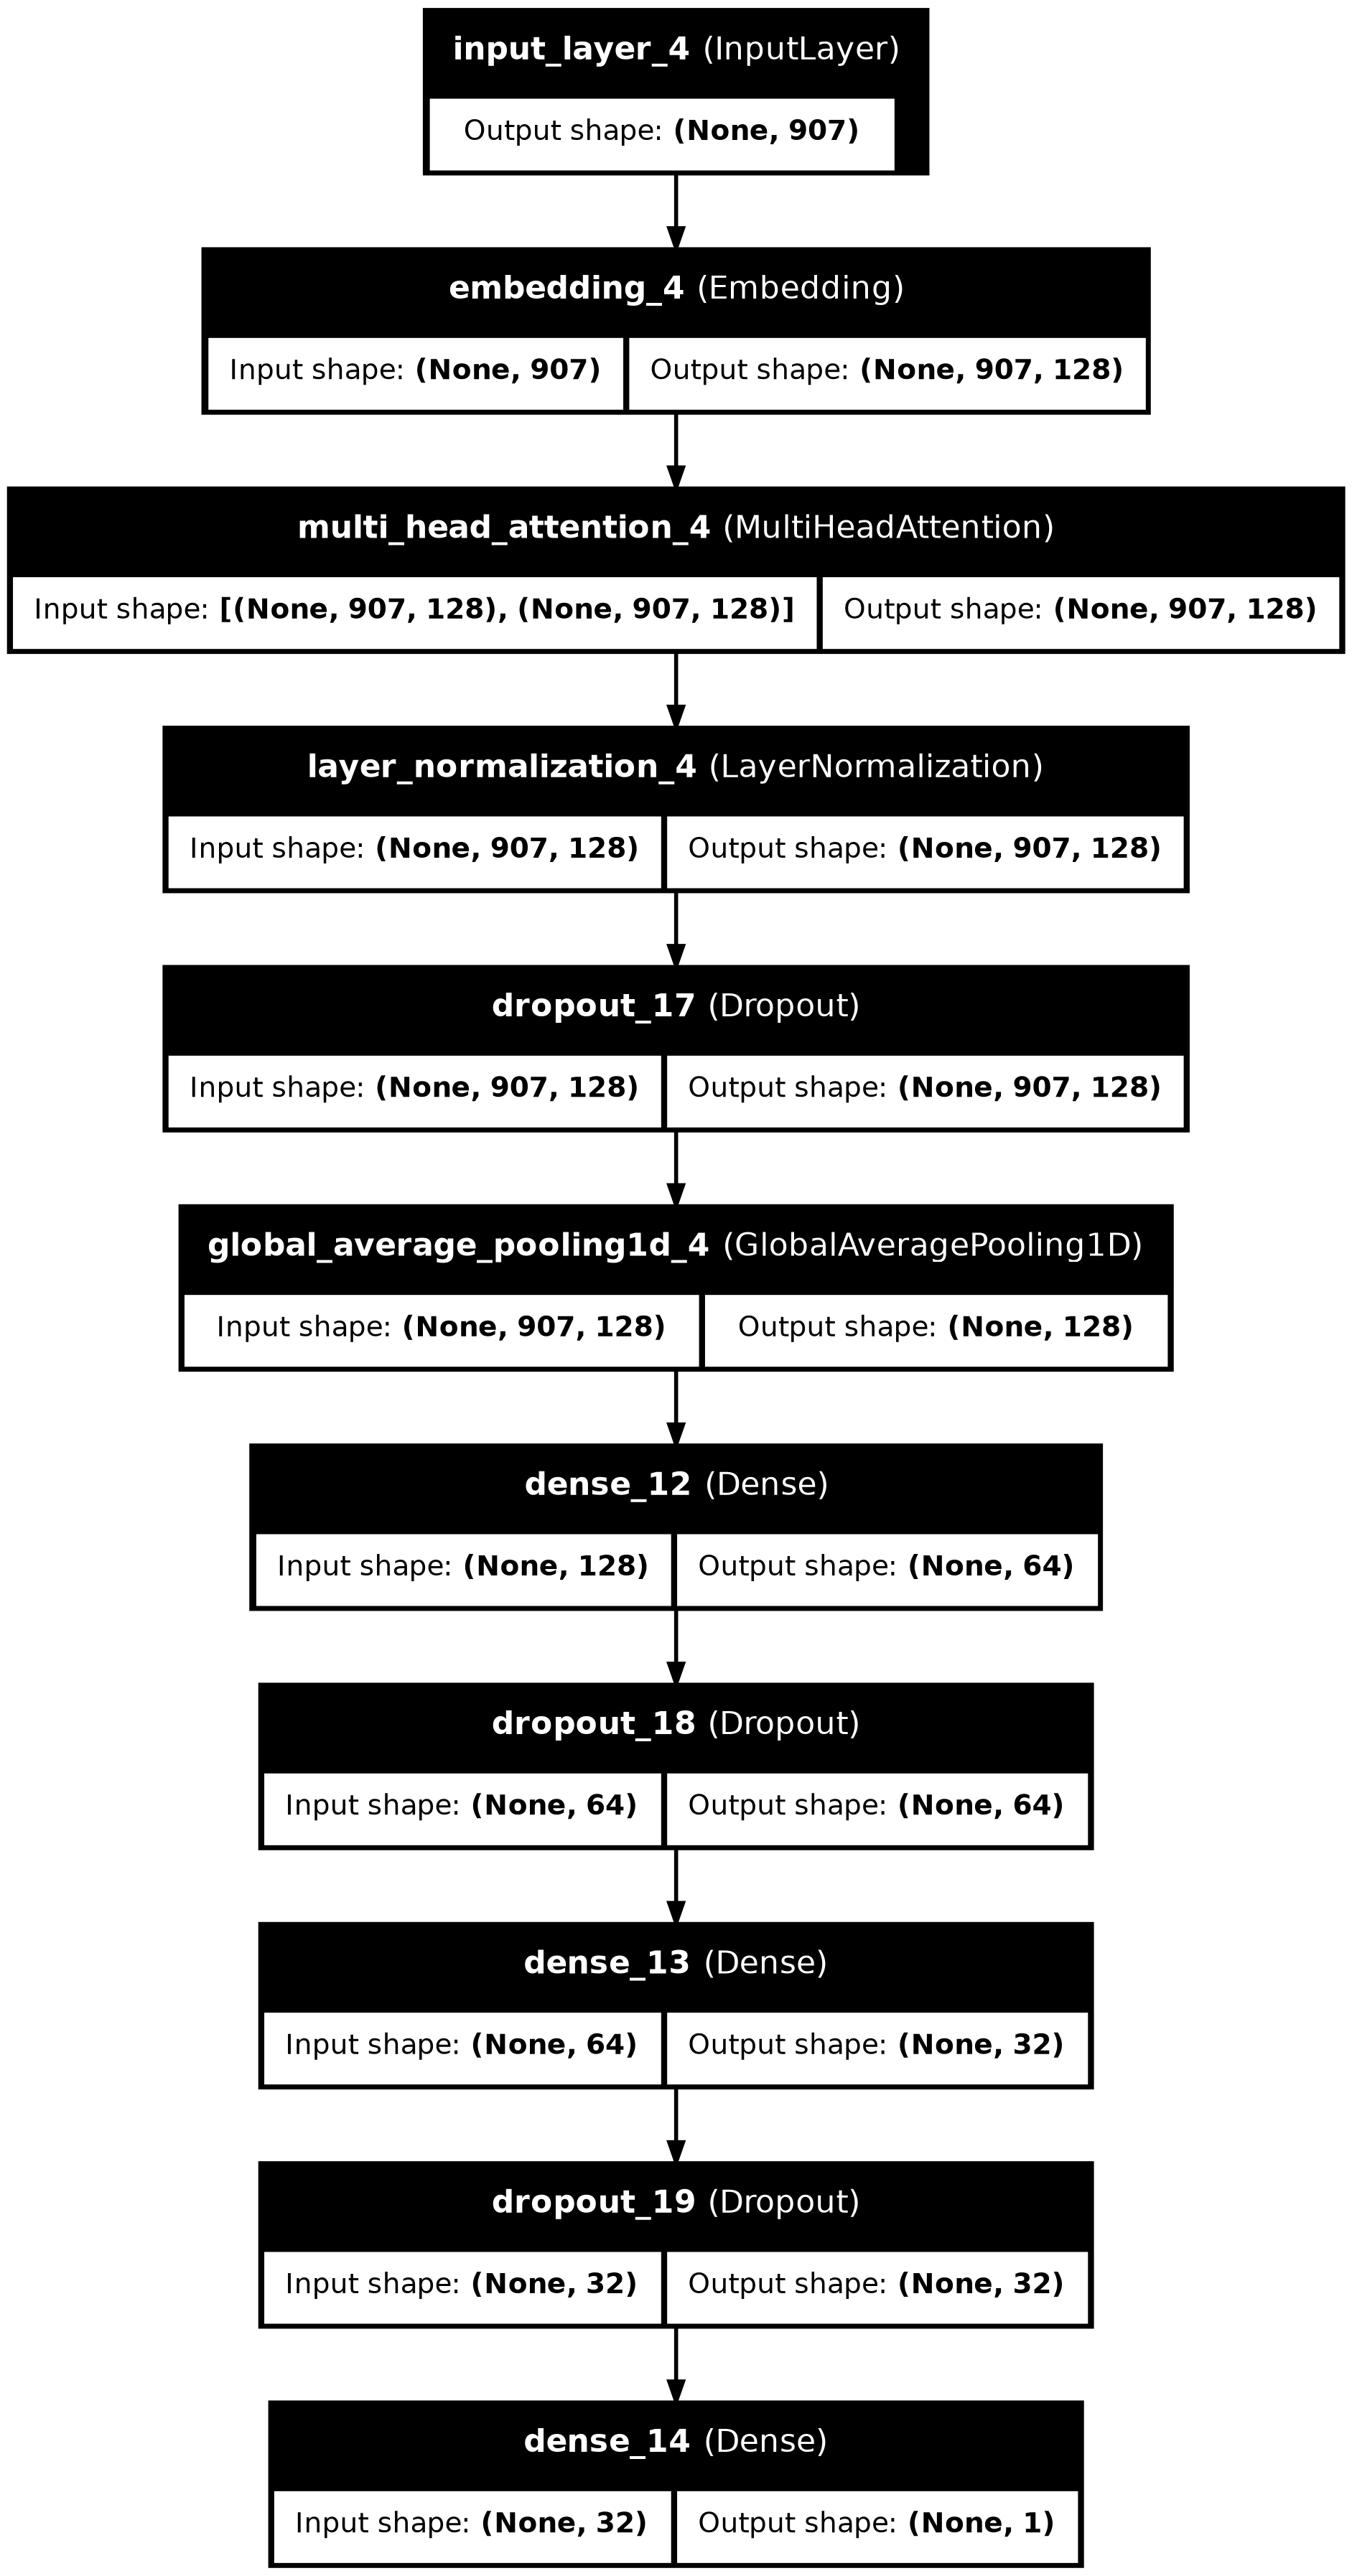

In [7]:
# Functional API Model
from tensorflow.keras.utils import plot_model
max_len = 907
inputs = Input(shape=(max_len,))
embedding = Embedding(input_dim=10000, output_dim=128)(inputs)

# Transformer Block
attention_output = MultiHeadAttention(num_heads=4, key_dim=128)(embedding, embedding)
attention_output = LayerNormalization()(attention_output)
attention_output = Dropout(0.3)(attention_output)

# Global Average Pooling
pooling_output = GlobalAveragePooling1D()(attention_output)

# Dense Layers
dense_1 = Dense(64, activation='relu')(pooling_output)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(32, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(dense_2)
output = Dense(1, activation='sigmoid')(dropout_2)

# Build the model using the correct input shape (sequence length = 875)
model = Model(inputs=inputs, outputs=output)
# model.build(input_shape=(None, 907))  # None = flexible batch size

# Visualize the architecture
plot_model(model, to_file='transfomer_model.png', show_shapes=True, show_layer_names=True)